In [1]:
# import os
# os.getcwd()

In [2]:
# pip install import-ipynb
# import sys
# print(sys.executable)

In [3]:
# import sys
# !{sys.executable} -m pip install import-ipynb

In [4]:
import import_ipynb
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime

In [5]:
# import os
# print(os.listdir())


In [6]:
# import os
# print(os.getcwd())

In [7]:
from nlp_modals import predict_label_bert,predict_category_bert,predict_label_bert_123
from get_airline_names_ import get_airline_names,get_all_airline_names
from Real_reviews import get_reviews
from plot_and_compare import plot_donutchart,get_percent,plot_barchart

C:\Users\yash\Desktop\Project\Scrape_data\airline-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
class airline_reviews:

    str_ = None
    lim_ = None
    airlines_names = None
    airline_name = None
    df = None
    df_expanded = None
    labels = None
    donut_path = None
    bar_path = None
    neg_percent = None
    neu_percent = None
    pos_percent = None
    unique_categories = None
    categoey_wise_reviews = {}
    donut_name=None
    bar_name=None
    reviewList = None

    def __init__(self,lim_,timestamp,airline_name=None):

        self.df = pd.DataFrame()

        if airline_name == None:
            
            self.str_ = input('\n\n\n\t\t\t\tEnter any substring irrespective of the airline name at any position: ')
            self.airlines_names = get_airline_names(self.str_)

            if len(self.airlines_names)>0:
                for i in range(len(self.airlines_names)):
                    print(str(i)+'.) '+self.airlines_names[i])
                
            else:
                # raise SystemExit  # Stops execution
        
                print('No airline found, Exiting flow\n\n\n\n')
                sys.exit()
            
            self.airline_name = self.airlines_names[int(input("\n\n\n\n\t\t\tEnter airline number from above list : "))]

        else:
            self.airline_name = airline_name
        
        self.lim_ = lim_
           
        self.df['reviews'] = get_reviews(self.airline_name,self.lim_)
        
        self.reviewList = self.df['reviews']
        
        self.df['labels'] = predict_label_bert_123(self.df['reviews'])
        
        self.labels = self.df['labels']
        
        self.df['category'] = predict_category_bert(self.df['reviews'])
        
        all_categories = [cat for sublist in self.df['category'] for cat in sublist]
        
        self.unique_categories = list(set(all_categories))

        self.categoey_wise_reviews = {key:[] for key in self.unique_categories}
        
        for review,category in zip(self.df['reviews'],self.df['category']):

            for cate in category:
                self.categoey_wise_reviews[cate].append(review)

        self.donut_name = f'donut_{self.airline_name}_{self.lim_}_Reviews_{timestamp}'
        self.bar_name = f'bar_{self.airline_name}_{self.lim_}_Reviews_{timestamp}'
        #full path can be copied from plot_and_compare
        
        self.donut_path = plot_donutchart(self.labels,self.donut_name)

        self.df_expanded = self.df.explode('category')
        self.bar_path = plot_barchart(self.df_expanded,self.bar_name)
        
        self.neg_percent,self.neu_percent,self.pos_percent = get_percent(self.labels)

How many airlines do you want to compare 2



				Enter number of reviews to be fetched 


				(If total review of any airline is less then required no then only available reviews willl be fetched) :  22



				Enter any substring irrespective of the airline name at any position:  ind


0.) air-india
1.) air-india-express
2.) airasia-india
3.) garuda-indonesia
4.) indigo-airlines
5.) malindo-air
6.) nordwind-airlines
7.) tailwind-airlines






			Enter airline number from above list :  1


https://www.airlinequality.com/airline-reviews/air-india-express/page/1
https://www.airlinequality.com/airline-reviews/air-india-express/page/2
https://www.airlinequality.com/airline-reviews/air-india-express/page/3


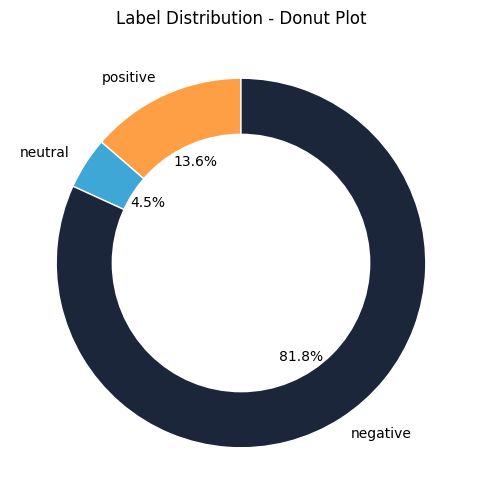

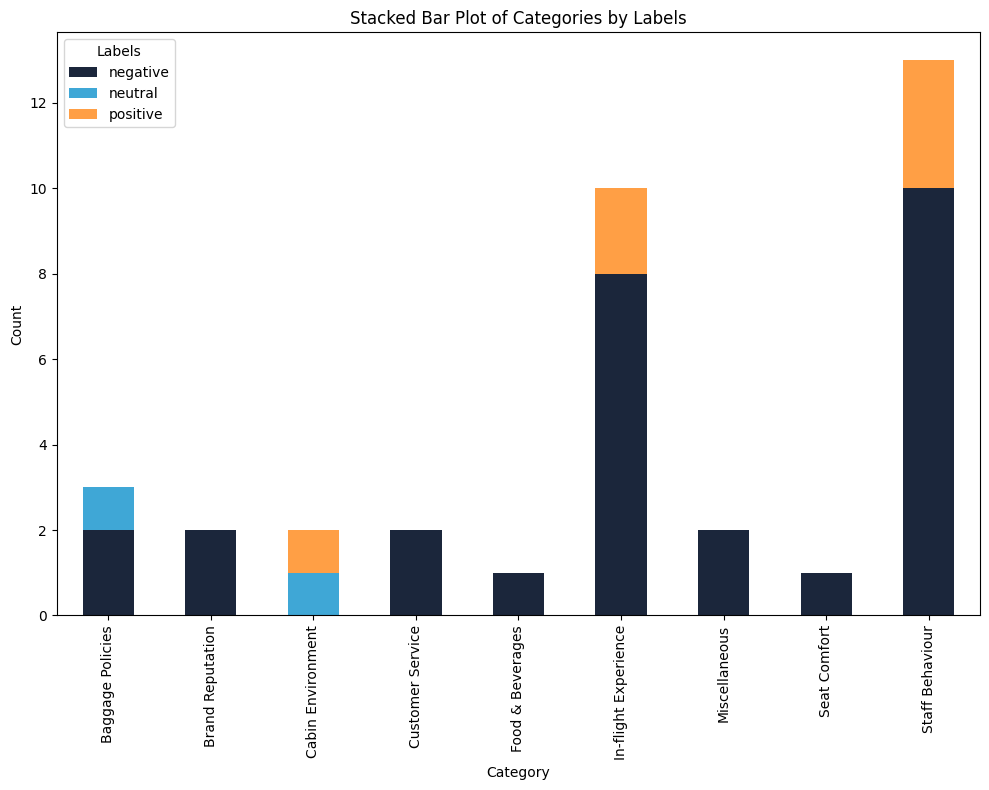




				Enter any substring irrespective of the airline name at any position:  brit


0.) british-airways






			Enter airline number from above list :  0


https://www.airlinequality.com/airline-reviews/british-airways/page/1
https://www.airlinequality.com/airline-reviews/british-airways/page/2
https://www.airlinequality.com/airline-reviews/british-airways/page/3


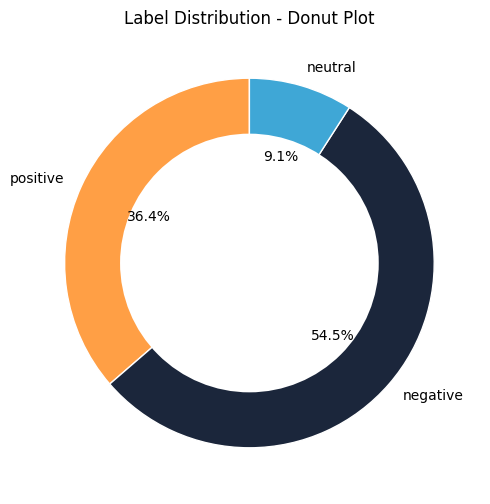

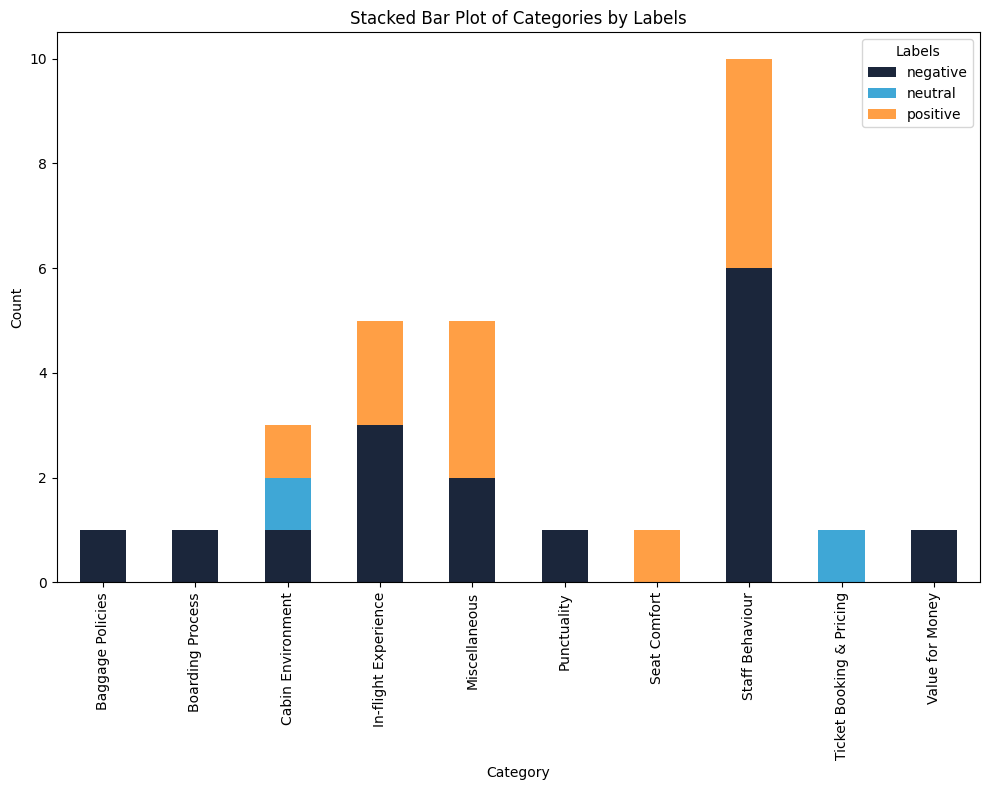

british-airways is best from all the selected onces


In [17]:
if __name__ == '__main__':
    n = int(input('How many airlines do you want to compare'))
    airlines = []
    
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    lim_ = int(input('\n\n\n\t\t\t\tEnter number of reviews to be fetched \n\n\n\t\t\t\t(If total review of any airline is less then required no then only available reviews willl be fetched) : '))
    
    for i in range(n):
        airlines.append(airline_reviews(lim_,timestamp))
    
    pos_per_list = []
    for i in range(n):
    
        pos_per_list.append(airlines[i].pos_percent)
    
    max_idx = pos_per_list.index(max(pos_per_list))
    print(airlines[max_idx].airline_name+' is best from all the selected onces')

In [20]:
# all_airline_names = get_all_airline_names()

# def get_all_airline_names_main():
#     return all_airline_names

# def get_airline_data(lim_ip,airline_name_ip):

#     timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
#     ar = airline_reviews(lim_ip,timestamp,airline_name_ip)
#     return ar.donut_path,ar.bar_path,ar.categoey_wise_reviews,ar.unique_categories,ar.reviewList
    

# timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
# ar = airline_reviews(30,timestamp,'air-india')
# # ar.df

# print(ar.df)

# len(ar.unique_categories)